In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import sys

In [ ]:
sys.path.append('/content/drive/MyDrive/')

In [ ]:
from analyzer import Analyzer

In [ ]:
analyzer = Analyzer('train')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/new_data_ruatd/prep_train.csv')
val = pd.read_csv('/content/drive/MyDrive/new_data_ruatd/prep_val.csv')
test = pd.read_csv('/content/drive/MyDrive/new_data_ruatd/prep_test.csv')

In [ ]:
train.shape, val.shape, test.shape

((129066, 79), (21511, 97), (64533, 96))

In [ ]:
analyzer.analyzed_col = 'sent_POS_Text'

NameError: ignored

In [ ]:
analyzer.VECTOR_SIZE

100

In [ ]:
train = analyzer.add_ft_vectors(train)

Train fasttext model is complete...


129066it [11:31, 186.55it/s]


Ok tokens: 4066910 | Not ok tokens: 0


In [ ]:
inf_analyzer = Analyzer('inference')
inf_analyzer.analyzed_col = 'sent_POS_Text'

In [ ]:
val.dropna(subset=['sent_POS_Text'], inplace=True)

In [ ]:
val = inf_analyzer.add_ft_vectors(val)
test = inf_analyzer.add_ft_vectors(test)

Train fasttext model is complete...


21510it [00:37, 574.75it/s]


Ok tokens: 677931 | Not ok tokens: 0
Train fasttext model is complete...


64533it [04:46, 225.50it/s]


Ok tokens: 2034630 | Not ok tokens: 0


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [ ]:
train['text'] = train['Text'].apply(lambda x: x[:512])
train['class'] = train['Class'].map({'M': 1, 'H': 0})

In [ ]:
val['text'] = val['Text'].apply(lambda x: x[:512])
val['class'] = val['Class'].map({'M': 1, 'H': 0})

In [ ]:
test['text'] = test['Text'].apply(lambda x: x[:512])

In [ ]:
train['text'] = train['text'].apply(lambda x: '[CLS] ' + x + ' [SEP]')

In [ ]:
val['text'] = val['text'].apply(lambda x: '[CLS] ' + x + ' [SEP]')

In [ ]:
test['text'] = test['text'].apply(lambda x: '[CLS] ' + x + ' [SEP]')

In [ ]:
cols = [col for col in list(train)]

dropped_cols = ['count_POS_Text', 
                'POS_Text', 
                'Id', 
                'Text', 
                'tokens_Text', 
                'class',
                'Class', 
                'POS_VERB_Text', 
                'POS_ADVB_Text', 
                'POS_NOUN_Text', 
                'POS_NPRO_Text', 
                'POS_INTJ_Text',
                'POS_COMP_Text',
                'POS_GRND_Text',
                'POS_PRED_Text',
                'POS_NUMR_Text',
                'POS_ADJS_Text',
                'POS_PRTS_Text',
                'POS_PRTF_Text',
                'avg_word_len_Text',
                'lemm_Text',
                'sent_POS_Text',
                'text']

for col in dropped_cols:
    cols.pop(cols.index(col))

In [ ]:
nuls = train[cols].isnull().sum() / train.shape[0]
nuls = nuls[nuls != 0]

In [ ]:
nuls.sort_values(ascending=False)

POS_INFN_Text    0.727798
POS_PRCL_Text    0.700889
POS_None_Text    0.570677
POS_CONJ_Text    0.395069
POS_ADJF_Text    0.220104
POS_PREP_Text    0.179621
dtype: float64

In [ ]:
train['POS_INTJ_Text'] = np.where(train['POS_INTJ_Text'].isnull(), 0, 1)
train['POS_COMP_Text'] = np.where(train['POS_COMP_Text'].isnull(), 0, 1)
train['POS_GRND_Text'] = np.where(train['POS_GRND_Text'].isnull(), 0, 1)
train['POS_PRED_Text'] = np.where(train['POS_PRED_Text'].isnull(), 0, 1)
train['POS_NUMR_Text'] = np.where(train['POS_NUMR_Text'].isnull(), 0, 1)
train['POS_ADJS_Text'] = np.where(train['POS_ADJS_Text'].isnull(), 0, 1)
train['POS_PRTS_Text'] = np.where(train['POS_PRTS_Text'].isnull(), 0, 1)
train['POS_PRTF_Text'] = np.where(train['POS_PRTF_Text'].isnull(), 0, 1)

In [ ]:
val['POS_INTJ_Text'] = np.where(val['POS_INTJ_Text'].isnull(), 0, 1)
val['POS_COMP_Text'] = np.where(val['POS_COMP_Text'].isnull(), 0, 1)
val['POS_GRND_Text'] = np.where(val['POS_GRND_Text'].isnull(), 0, 1)
val['POS_PRED_Text'] = np.where(val['POS_PRED_Text'].isnull(), 0, 1)
val['POS_NUMR_Text'] = np.where(val['POS_NUMR_Text'].isnull(), 0, 1)
val['POS_ADJS_Text'] = np.where(val['POS_ADJS_Text'].isnull(), 0, 1)
val['POS_PRTS_Text'] = np.where(val['POS_PRTS_Text'].isnull(), 0, 1)
val['POS_PRTF_Text'] = np.where(val['POS_PRTF_Text'].isnull(), 0, 1)

In [ ]:
test['POS_INTJ_Text'] = np.where(test['POS_INTJ_Text'].isnull(), 0, 1)
test['POS_COMP_Text'] = np.where(test['POS_COMP_Text'].isnull(), 0, 1)
test['POS_GRND_Text'] = np.where(test['POS_GRND_Text'].isnull(), 0, 1)
test['POS_PRED_Text'] = np.where(test['POS_PRED_Text'].isnull(), 0, 1)
test['POS_NUMR_Text'] = np.where(test['POS_NUMR_Text'].isnull(), 0, 1)
test['POS_ADJS_Text'] = np.where(test['POS_ADJS_Text'].isnull(), 0, 1)
test['POS_PRTS_Text'] = np.where(test['POS_PRTS_Text'].isnull(), 0, 1)
test['POS_PRTF_Text'] = np.where(test['POS_PRTF_Text'].isnull(), 0, 1)

In [ ]:
train.fillna(0, inplace=True)
val.fillna(0, inplace=True)

In [ ]:
test.fillna(0, inplace=True)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
x_train, y_train = train[cols], train['class']
x_val, y_val = val[cols], val['class']
x_test = test[cols]

In [ ]:
from transformers import RobertaTokenizer, RobertaModel, BertTokenizer, BertModel

tokenizer = BertTokenizer.from_pretrained("DeepPavlov/rubert-base-cased")

In [ ]:
from tqdm import tqdm

tokenized_texts = [tokenizer.tokenize(sent) for sent in tqdm(train['text'])]
val_tokenized_texts = [tokenizer.tokenize(sent) for sent in tqdm(val['text'])]
test_tokenized_texts = [tokenizer.tokenize(sent) for sent in tqdm(test['text'])]

100%|██████████| 64533/64533 [00:40<00:00, 1598.62it/s]


In [ ]:
feature_cols = [col for col in list(x_train)]

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_inputs = [tokenizer.convert_tokens_to_ids(x) for x in tqdm(tokenized_texts)]

train_inputs = pad_sequences(train_inputs, 
                          dtype='long', 
                          padding='post', 
                          truncating='post')

train_masks = [[float(i>0) for i in seq] for seq in train_inputs]

validation_inputs = [tokenizer.convert_tokens_to_ids(x) for x in tqdm(val_tokenized_texts)]

validation_inputs = pad_sequences(validation_inputs, 
                          dtype='long', 
                          padding='post', 
                          truncating='post')


validation_masks = [[float(i>0) for i in seq] for seq in validation_inputs]

train_labels, validation_labels = np.array(y_train), np.array(y_val)

train_inputs = torch.tensor(train_inputs)
train_labels = torch.tensor(train_labels)
train_masks = torch.tensor(train_masks)

train_features = np.array(train[feature_cols], dtype='float32')
validation_features = np.array(val[feature_cols], dtype='float32')
train_features = scaler.fit_transform(train_features)
validation_features = scaler.transform(validation_features)

train_features = torch.tensor(train_features)
validation_features = torch.tensor(validation_features)

validation_inputs = torch.tensor(validation_inputs)
validation_labels = torch.tensor(validation_labels)
validation_masks = torch.tensor(validation_masks)

100%|██████████| 21510/21510 [00:00<00:00, 24515.90it/s]


In [ ]:
test_inputs = [tokenizer.convert_tokens_to_ids(x) for x in tqdm(test_tokenized_texts)]

test_inputs = pad_sequences(test_inputs, 
                          dtype='long', 
                          padding='post', 
                          truncating='post')

test_masks = [[float(i>0) for i in seq] for seq in test_inputs]

test_inputs = torch.tensor(test_inputs)
test_masks = torch.tensor(test_masks)

test_features = np.array(test[feature_cols], dtype='float32')
test_features = scaler.transform(test_features)
test_features = torch.tensor(test_features)

100%|██████████| 64533/64533 [00:02<00:00, 23884.18it/s]


In [ ]:
batch_size = 12

train_data = torch.utils.data.TensorDataset(train_inputs, train_masks, train_features, train_labels)
train_dataloader = torch.utils.data.DataLoader(
    train_data,
    batch_size=batch_size,
    sampler=torch.utils.data.RandomSampler(train_data)
)

validation_data = torch.utils.data.TensorDataset(validation_inputs, validation_masks, validation_features, validation_labels)
validation_dataloader = torch.utils.data.DataLoader(
    validation_data,
    batch_size=batch_size,
    sampler=torch.utils.data.SequentialSampler(validation_data)
)

test_data = torch.utils.data.TensorDataset(test_inputs, test_masks, test_features)
test_dataloader = torch.utils.data.DataLoader(
    test_data,
    batch_size=batch_size,
    sampler=torch.utils.data.SequentialSampler(test_data)
)

In [ ]:
from transformers import AdamW, BertConfig
from torch.nn import functional as F

In [ ]:
from transformers import RobertaConfig, BertConfig

In [ ]:

class myBertModel(torch.nn.Module):
    def __init__(self, hidden_neurons, n_features):
        super(myBertModel, self).__init__()
        config = BertConfig.from_pretrained('DeepPavlov/rubert-base-cased', num_labels=2)
        self.model = BertModel.from_pretrained('DeepPavlov/rubert-base-cased', config=config)
        self.hidden_neurons = hidden_neurons
        self.n_features = n_features
        self.linear1 = torch.nn.Linear(config.hidden_size, self.hidden_neurons)
        self.linear2 = torch.nn.Linear(self.hidden_neurons, int(self.hidden_neurons / 2))
        self.linear3 = torch.nn.Linear(self.n_features, int(self.n_features / 2))
        self.linear4 = torch.nn.Linear(int(self.n_features / 2), int(self.hidden_neurons / 2))
        self.classifier = torch.nn.Linear(self.hidden_neurons, 1)
        #self.activation = torch.nn.Sigmoid()
        self.dropout = torch.nn.Dropout(.3)
        self.batchnorm1 = torch.nn.BatchNorm1d(self.hidden_neurons)
        self.batchnorm2 = torch.nn.BatchNorm1d(int(self.hidden_neurons / 2))
        self.batchnorm3 = torch.nn.BatchNorm1d(int(self.n_features / 2))
        self.batchnorm4 = torch.nn.BatchNorm1d(int(self.hidden_neurons / 2))

    def forward(self, input_ids, attention_mask, features):
        bert_output = self.model(input_ids=input_ids, attention_mask=attention_mask)
        seq_output = bert_output[0]
        pooled_output = seq_output.mean(axis=1)
        pooled_output = self.dropout(pooled_output)
        
        x1 = self.dropout(F.relu(self.batchnorm1(self.linear1(pooled_output))))
        x1 = self.dropout(F.relu(self.batchnorm2(self.linear2(x1))))
        x2 = self.dropout(F.relu(self.batchnorm3(self.linear3(features))))
        x2 = self.dropout(F.relu(self.batchnorm4(self.linear4(x2))))
        
        scores = self.dropout(self.classifier(torch.cat([x1, x2], dim=1)))
        #scores = self.activation(scores)
        return scores

my_model = myBertModel(hidden_neurons=512, n_features=len(feature_cols))
# my_model = myBertModel(hidden_neurons=512)

In [ ]:
optimizer = AdamW(my_model.parameters(), lr=1e-5)
loss = torch.nn.CrossEntropyLoss()

In [ ]:
my_model.to('cpu')
my_model.to(device)
my_model.train()

myBertModel(
  (model): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(119547, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True

In [ ]:
from tqdm import tqdm
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, classification_report

In [ ]:
n_epochs = 2
# model = my_model

In [ ]:
def train_bert(model, n_model, n_epochs, train_dataloader, validation_dataloader):
    optimizer = AdamW(model.parameters(), lr=1e-5)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min')
    #loss = torch.nn.CrossEntropyLoss()
    loss = torch.nn.BCEWithLogitsLoss()
    loss_set = []
    val_loss_set = []

    for epoch in range(n_epochs):
          epoch_loss_set = []

          model.train()

          for j, batch in enumerate(tqdm(train_dataloader)):
              
              batch = tuple(t.to(device) for t in batch)
              b_input_ids, b_input_mask, b_features, b_labels = batch
              
              optimizer.zero_grad()
              
              pred_probs = model.forward(b_input_ids, b_input_mask, b_features)

              b_labels = b_labels.float().reshape(-1, 1) # удалить при смене

              my_loss = loss(pred_probs, b_labels)
              epoch_loss_set.append(my_loss.item())
              my_loss.backward()
              
              pred_probs = torch.nn.Sigmoid()(pred_probs)
              pred_probs = pred_probs.detach().to('cpu').numpy()
              #pred_labels = pred_probs.argmax(axis=1) # восстановить при смене
              pred_labels = np.where(pred_probs > 0.5, 1, 0)
              b_labels = b_labels.to('cpu').numpy()
                  
              optimizer.step()
                  
              if j == 0:
                  all_train_labels = b_labels
                  all_train_preds = pred_labels
              else:
                  all_train_labels = np.vstack([all_train_labels, b_labels])
                  all_train_preds = np.vstack([all_train_preds, pred_labels])
                          
          loss_set.extend(epoch_loss_set)
          
          train_f1 = f1_score(all_train_labels, all_train_preds)
          print(classification_report(all_train_labels, all_train_preds))  
          print()
          print('Epoch {} ... Train f1: {:.2f} ... Mean train loss: {:.4f}'.format(epoch, train_f1, np.mean(epoch_loss_set)))
          print()

          epoch_val_loss_set = []

          model.eval()

          for j, batch in enumerate(tqdm(validation_dataloader)):
              batch = tuple(t.to(device) for t in batch)
              b_input_ids, b_input_mask, b_features, b_labels = batch
              
  #             val_labels = np.zeros([b_labels.shape[0], n_target])
  #             val_preds = np.zeros([b_labels.shape[0], n_target])
              
              with torch.no_grad():
                  pred_probs = model.forward(b_input_ids, b_input_mask, b_features)

                  b_labels = b_labels.float().reshape(-1, 1) # удалить при смене

                  val_loss = loss(pred_probs, b_labels)
                  epoch_val_loss_set.append(val_loss.item())

                  b_labels = b_labels.to('cpu').numpy()
                  pred_probs = torch.nn.Sigmoid()(pred_probs)
                  pred_probs = pred_probs.detach().to('cpu').numpy()
                  #pred_labels = pred_probs.argmax(axis=1)  # восстановить при смене
                  pred_labels = np.where(pred_probs > 0.5, 1, 0)
              
              if j == 0:
                  all_val_labels = b_labels
                  all_val_preds = pred_labels
              else:
                  all_val_labels = np.vstack([all_val_labels, b_labels])
                  all_val_preds = np.vstack([all_val_preds, pred_labels])
          
          scheduler.step(np.mean(epoch_val_loss_set))
          
          val_loss_set.extend(epoch_val_loss_set)

          val_f1 = f1_score(all_val_labels, all_val_preds)
          print(classification_report(all_val_labels, all_val_preds))  
          print()
          print('Epoch {} ... Val f1: {:.2f} ... Mean val loss: {:.4f}'.format(epoch, val_f1, np.mean(epoch_val_loss_set)))
          print()
          print('-------------------------------------------------------------------------------------------------------------------------')
          print()
          torch.save(model.state_dict(), f'/content/drive/MyDrive/ruatd_models/bert_model_{n_model}_{epoch}.pt')

    return model, loss_set, val_loss_set

In [ ]:
# 100%|██████████| 16134/16134 [1:06:39<00:00,  4.03it/s]

# Epoch 0 ... Train f1: 0.60 ... Mean train loss: 0.6484

# 100%|██████████| 2689/2689 [02:58<00:00, 15.05it/s]

# Epoch 0 ... Val f1: 0.74 ... Mean val loss: 0.5599

# -------------------------------------------------------------------------------------------------------------------------

# 100%|██████████| 16134/16134 [1:06:45<00:00,  4.03it/s]

# Epoch 1 ... Train f1: 0.72 ... Mean train loss: 0.5833

# 100%|██████████| 2689/2689 [02:59<00:00, 14.98it/s]

# Epoch 1 ... Val f1: 0.77 ... Mean val loss: 0.5299

In [ ]:
model_0, loss_set, val_loss_set = train_bert(model = my_model, 
                                            n_model = 0,
                                            n_epochs = n_epochs, 
                                            train_dataloader = train_dataloader, 
                                            validation_dataloader = validation_dataloader)

100%|██████████| 10756/10756 [1:03:11<00:00,  2.84it/s]


              precision    recall  f1-score   support

           0       0.70      0.77      0.73     64535
           1       0.74      0.67      0.70     64531

    accuracy                           0.72    129066
   macro avg       0.72      0.72      0.72    129066
weighted avg       0.72      0.72      0.72    129066


Epoch 0 ... Train f1: 0.70 ... Mean train loss: 0.5891



100%|██████████| 1793/1793 [03:04<00:00,  9.74it/s]


              precision    recall  f1-score   support

           0       0.77      0.82      0.79     10755
           1       0.81      0.75      0.78     10755

    accuracy                           0.79     21510
   macro avg       0.79      0.79      0.78     21510
weighted avg       0.79      0.79      0.78     21510


Epoch 0 ... Val f1: 0.78 ... Mean val loss: 0.5146

-------------------------------------------------------------------------------------------------------------------------



100%|██████████| 10756/10756 [1:03:07<00:00,  2.84it/s]


              precision    recall  f1-score   support

           0       0.76      0.84      0.80     64535
           1       0.82      0.74      0.78     64531

    accuracy                           0.79    129066
   macro avg       0.79      0.79      0.79    129066
weighted avg       0.79      0.79      0.79    129066


Epoch 1 ... Train f1: 0.78 ... Mean train loss: 0.5371



100%|██████████| 1793/1793 [03:04<00:00,  9.72it/s]


              precision    recall  f1-score   support

           0       0.78      0.81      0.80     10755
           1       0.80      0.78      0.79     10755

    accuracy                           0.79     21510
   macro avg       0.79      0.79      0.79     21510
weighted avg       0.79      0.79      0.79     21510


Epoch 1 ... Val f1: 0.79 ... Mean val loss: 0.5052

-------------------------------------------------------------------------------------------------------------------------



In [ ]:
model_5, loss_set, val_loss_set = train_bert(model = my_model, 
                                            n_model = 5,
                                            n_epochs = n_epochs, 
                                            train_dataloader = train_dataloader, 
                                            validation_dataloader = validation_dataloader)

100%|██████████| 10756/10756 [1:03:27<00:00,  2.83it/s]


              precision    recall  f1-score   support

         0.0       0.66      0.87      0.75     64535
         1.0       0.81      0.56      0.66     64531

    accuracy                           0.71    129066
   macro avg       0.74      0.71      0.71    129066
weighted avg       0.74      0.71      0.71    129066


Epoch 0 ... Train f1: 0.66 ... Mean train loss: 0.4918



100%|██████████| 1793/1793 [03:06<00:00,  9.59it/s]


              precision    recall  f1-score   support

         0.0       0.81      0.76      0.79     10755
         1.0       0.78      0.83      0.80     10755

    accuracy                           0.79     21510
   macro avg       0.80      0.79      0.79     21510
weighted avg       0.80      0.79      0.79     21510


Epoch 0 ... Val f1: 0.80 ... Mean val loss: 0.4137

-------------------------------------------------------------------------------------------------------------------------



100%|██████████| 10756/10756 [1:03:28<00:00,  2.82it/s]


              precision    recall  f1-score   support

         0.0       0.69      0.90      0.78     64535
         1.0       0.86      0.60      0.70     64531

    accuracy                           0.75    129066
   macro avg       0.77      0.75      0.74    129066
weighted avg       0.77      0.75      0.74    129066


Epoch 1 ... Train f1: 0.70 ... Mean train loss: 0.4388



100%|██████████| 1793/1793 [03:05<00:00,  9.64it/s]


              precision    recall  f1-score   support

         0.0       0.77      0.86      0.81     10755
         1.0       0.84      0.74      0.79     10755

    accuracy                           0.80     21510
   macro avg       0.81      0.80      0.80     21510
weighted avg       0.81      0.80      0.80     21510


Epoch 1 ... Val f1: 0.79 ... Mean val loss: 0.4000

-------------------------------------------------------------------------------------------------------------------------



In [ ]:
model_5, loss_set_1, val_loss_set_1 = train_bert(model = model_5, 
                                            n_model = 5,
                                            n_epochs = 1, 
                                            train_dataloader = train_dataloader, 
                                            validation_dataloader = validation_dataloader)

100%|██████████| 4303/4303 [57:06<00:00,  1.26it/s]


              precision    recall  f1-score   support

           0       0.80      0.88      0.84     64535
           1       0.86      0.78      0.82     64531

    accuracy                           0.83    129066
   macro avg       0.83      0.83      0.83    129066
weighted avg       0.83      0.83      0.83    129066


Epoch 0 ... Train f1: 0.82 ... Mean train loss: 0.3476



100%|██████████| 717/717 [02:51<00:00,  4.18it/s]


              precision    recall  f1-score   support

           0       0.79      0.83      0.81     10755
           1       0.82      0.77      0.80     10755

    accuracy                           0.80     21510
   macro avg       0.80      0.80      0.80     21510
weighted avg       0.80      0.80      0.80     21510


Epoch 0 ... Val f1: 0.80 ... Mean val loss: 0.4084

-------------------------------------------------------------------------------------------------------------------------



In [ ]:
my_model = myBertModel(hidden_neurons=512, n_features=len(feature_cols))

my_model.to(device)

model_1, loss_set, val_loss_set = train_bert(model = my_model, 
                                            n_model = 1,
                                            n_epochs = n_epochs, 
                                            train_dataloader = train_dataloader, 
                                            validation_dataloader = validation_dataloader)

100%|██████████| 10756/10756 [1:03:07<00:00,  2.84it/s]


              precision    recall  f1-score   support

           0       0.70      0.77      0.73     64535
           1       0.74      0.67      0.70     64531

    accuracy                           0.72    129066
   macro avg       0.72      0.72      0.72    129066
weighted avg       0.72      0.72      0.72    129066


Epoch 0 ... Train f1: 0.70 ... Mean train loss: 0.5886



100%|██████████| 1793/1793 [03:04<00:00,  9.74it/s]


              precision    recall  f1-score   support

           0       0.80      0.78      0.79     10755
           1       0.79      0.80      0.79     10755

    accuracy                           0.79     21510
   macro avg       0.79      0.79      0.79     21510
weighted avg       0.79      0.79      0.79     21510


Epoch 0 ... Val f1: 0.79 ... Mean val loss: 0.5123

-------------------------------------------------------------------------------------------------------------------------



100%|██████████| 10756/10756 [1:03:06<00:00,  2.84it/s]


              precision    recall  f1-score   support

           0       0.76      0.83      0.79     64535
           1       0.82      0.73      0.77     64531

    accuracy                           0.78    129066
   macro avg       0.79      0.78      0.78    129066
weighted avg       0.79      0.78      0.78    129066


Epoch 1 ... Train f1: 0.77 ... Mean train loss: 0.5417



100%|██████████| 1793/1793 [03:04<00:00,  9.74it/s]


              precision    recall  f1-score   support

           0       0.82      0.74      0.78     10755
           1       0.76      0.84      0.80     10755

    accuracy                           0.79     21510
   macro avg       0.79      0.79      0.79     21510
weighted avg       0.79      0.79      0.79     21510


Epoch 1 ... Val f1: 0.80 ... Mean val loss: 0.5066

-------------------------------------------------------------------------------------------------------------------------



In [ ]:
my_model = myBertModel(hidden_neurons=512, n_features=len(feature_cols))

my_model.to(device)

model_2, loss_set, val_loss_set = train_bert(model = my_model, 
                                            n_model = 2,
                                            n_epochs = n_epochs, 
                                            train_dataloader = train_dataloader, 
                                            validation_dataloader = validation_dataloader)

100%|██████████| 10756/10756 [1:03:06<00:00,  2.84it/s]


              precision    recall  f1-score   support

           0       0.70      0.76      0.73     64535
           1       0.74      0.67      0.70     64531

    accuracy                           0.71    129066
   macro avg       0.72      0.71      0.71    129066
weighted avg       0.72      0.71      0.71    129066


Epoch 0 ... Train f1: 0.70 ... Mean train loss: 0.5903



100%|██████████| 1793/1793 [03:04<00:00,  9.74it/s]


              precision    recall  f1-score   support

           0       0.82      0.73      0.77     10755
           1       0.76      0.84      0.80     10755

    accuracy                           0.78     21510
   macro avg       0.79      0.78      0.78     21510
weighted avg       0.79      0.78      0.78     21510


Epoch 0 ... Val f1: 0.80 ... Mean val loss: 0.5124

-------------------------------------------------------------------------------------------------------------------------



100%|██████████| 10756/10756 [1:03:07<00:00,  2.84it/s]


              precision    recall  f1-score   support

           0       0.76      0.84      0.80     64535
           1       0.82      0.74      0.78     64531

    accuracy                           0.79    129066
   macro avg       0.79      0.79      0.79    129066
weighted avg       0.79      0.79      0.79    129066


Epoch 1 ... Train f1: 0.78 ... Mean train loss: 0.5402



100%|██████████| 1793/1793 [03:04<00:00,  9.74it/s]


              precision    recall  f1-score   support

           0       0.77      0.83      0.80     10755
           1       0.82      0.76      0.79     10755

    accuracy                           0.79     21510
   macro avg       0.80      0.79      0.79     21510
weighted avg       0.80      0.79      0.79     21510


Epoch 1 ... Val f1: 0.79 ... Mean val loss: 0.5062

-------------------------------------------------------------------------------------------------------------------------



In [ ]:
my_model = myBertModel(hidden_neurons=512, n_features=len(feature_cols))

my_model.to(device)

model_3, loss_set, val_loss_set = train_bert(model = my_model, 
                                            n_model = 3,
                                            n_epochs = n_epochs, 
                                            train_dataloader = train_dataloader, 
                                            validation_dataloader = validation_dataloader)

100%|██████████| 10756/10756 [1:03:12<00:00,  2.84it/s]


              precision    recall  f1-score   support

           0       0.69      0.77      0.73     64535
           1       0.74      0.66      0.70     64531

    accuracy                           0.71    129066
   macro avg       0.72      0.71      0.71    129066
weighted avg       0.72      0.71      0.71    129066


Epoch 0 ... Train f1: 0.70 ... Mean train loss: 0.5902



100%|██████████| 1793/1793 [03:04<00:00,  9.72it/s]


              precision    recall  f1-score   support

           0       0.77      0.81      0.79     10755
           1       0.80      0.76      0.78     10755

    accuracy                           0.79     21510
   macro avg       0.79      0.79      0.79     21510
weighted avg       0.79      0.79      0.79     21510


Epoch 0 ... Val f1: 0.78 ... Mean val loss: 0.5123

-------------------------------------------------------------------------------------------------------------------------



100%|██████████| 10756/10756 [1:03:07<00:00,  2.84it/s]


              precision    recall  f1-score   support

           0       0.76      0.83      0.79     64535
           1       0.81      0.73      0.77     64531

    accuracy                           0.78    129066
   macro avg       0.79      0.78      0.78    129066
weighted avg       0.79      0.78      0.78    129066


Epoch 1 ... Train f1: 0.77 ... Mean train loss: 0.5422



100%|██████████| 1793/1793 [03:04<00:00,  9.72it/s]


              precision    recall  f1-score   support

           0       0.77      0.81      0.79     10755
           1       0.80      0.76      0.78     10755

    accuracy                           0.78     21510
   macro avg       0.78      0.78      0.78     21510
weighted avg       0.78      0.78      0.78     21510


Epoch 1 ... Val f1: 0.78 ... Mean val loss: 0.5133

-------------------------------------------------------------------------------------------------------------------------



In [ ]:
my_model = myBertModel(hidden_neurons=512, n_features=len(feature_cols))

my_model.to(device)

model_4, loss_set, val_loss_set = train_bert(model = my_model, 
                                            n_model = 4,
                                            n_epochs = n_epochs, 
                                            train_dataloader = train_dataloader, 
                                            validation_dataloader = validation_dataloader)

100%|██████████| 10756/10756 [1:03:16<00:00,  2.83it/s]


              precision    recall  f1-score   support

           0       0.70      0.76      0.73     64535
           1       0.74      0.67      0.70     64531

    accuracy                           0.72    129066
   macro avg       0.72      0.72      0.72    129066
weighted avg       0.72      0.72      0.72    129066


Epoch 0 ... Train f1: 0.70 ... Mean train loss: 0.5890



100%|██████████| 1793/1793 [03:05<00:00,  9.69it/s]


              precision    recall  f1-score   support

           0       0.81      0.69      0.75     10755
           1       0.73      0.84      0.78     10755

    accuracy                           0.77     21510
   macro avg       0.77      0.77      0.76     21510
weighted avg       0.77      0.77      0.76     21510


Epoch 0 ... Val f1: 0.78 ... Mean val loss: 0.5302

-------------------------------------------------------------------------------------------------------------------------



100%|██████████| 10756/10756 [1:03:12<00:00,  2.84it/s]


              precision    recall  f1-score   support

           0       0.76      0.84      0.79     64535
           1       0.82      0.73      0.77     64531

    accuracy                           0.78    129066
   macro avg       0.79      0.78      0.78    129066
weighted avg       0.79      0.78      0.78    129066


Epoch 1 ... Train f1: 0.77 ... Mean train loss: 0.5423



100%|██████████| 1793/1793 [03:04<00:00,  9.71it/s]


              precision    recall  f1-score   support

           0       0.72      0.90      0.80     10755
           1       0.86      0.65      0.74     10755

    accuracy                           0.77     21510
   macro avg       0.79      0.77      0.77     21510
weighted avg       0.79      0.77      0.77     21510


Epoch 1 ... Val f1: 0.74 ... Mean val loss: 0.5246

-------------------------------------------------------------------------------------------------------------------------



In [ ]:
my_model = myBertModel(hidden_neurons=512, n_features=len(feature_cols))

my_model.to(device)

model_5, loss_set, val_loss_set = train_bert(model = my_model, 
                                            n_model = 5,
                                            n_epochs = n_epochs, 
                                            train_dataloader = train_dataloader, 
                                            validation_dataloader = validation_dataloader)

In [ ]:
my_model = myBertModel(hidden_neurons=512, n_features=len(feature_cols))

my_model.to(device)

model_6, loss_set, val_loss_set = train_bert(model = my_model, 
                                            n_model = 6,
                                            n_epochs = n_epochs, 
                                            train_dataloader = train_dataloader, 
                                            validation_dataloader = validation_dataloader)

In [ ]:
my_model = myBertModel(hidden_neurons=512, n_features=len(feature_cols))

my_model.to(device)

model_7, loss_set, val_loss_set = train_bert(model = my_model, 
                                            n_model = 7,
                                            n_epochs = n_epochs, 
                                            train_dataloader = train_dataloader, 
                                            validation_dataloader = validation_dataloader)

In [ ]:
loss_set = []
val_loss_set = []

n_epochs = 3

for epoch in range(n_epochs):
    
    train_labels = []
    train_preds = []
    
    my_model.train()
    
    for batch in train_dataloader:
        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_input_mask, b_features, b_labels = batch
        optimizer.zero_grad()
        pred_probs = my_model.forward(b_input_ids, b_input_mask, b_features)
        my_loss = loss(pred_probs, b_labels)
        loss_set.append(my_loss.item())
        my_loss.backward()
        optimizer.step()
        
        b_labels = b_labels.to('cpu').numpy()
        pred_probs = pred_probs.detach().to('cpu').numpy()
        pred_labels = pred_probs.argmax(axis=1)
        
        train_labels.extend(b_labels)
        train_preds.extend(pred_labels)
        
    train_acc = accuracy_score(train_labels, train_preds)
    train_precision = precision_score(train_labels, train_preds)
    train_recall = recall_score(train_labels, train_preds)
    train_f1 = f1_score(train_labels, train_preds)   
    
    print('Epoch {} ... Train accuracy: {:.2f} ... Train precision: {:.2f} ... Train recall: {:.2f} ... Train f1: {:.2f} ... Train loss: {:.4f}'.format(epoch, train_acc, train_precision, train_recall, train_f1, my_loss.item()))
        
    val_labels = []
    val_preds = []
    
    my_model.eval()
    
    for batch in validation_dataloader:
        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_input_mask, b_features, b_labels = batch

        with torch.no_grad():
            pred_probs = my_model.forward(b_input_ids, b_input_mask, b_features)
            val_loss = loss(pred_probs, b_labels)
            val_loss_set.append(val_loss.item())

        b_labels = b_labels.to('cpu').numpy()
        pred_probs = pred_probs.detach().to('cpu').numpy()

        pred_labels = pred_probs.argmax(axis=1)

        val_labels.extend(b_labels)
        val_preds.extend(pred_labels)

    val_acc = accuracy_score(val_labels, val_preds)
    val_precision = precision_score(val_labels, val_preds)
    val_recall = recall_score(val_labels, val_preds)
    val_f1 = f1_score(val_labels, val_preds)

    print('Epoch {} ... Val accuracy: {:.2f} ... Val precision: {:.2f} ... Val recall: {:.2f} ... Val f1: {:.2f} ... Val loss: {:.4f}'.format(epoch, val_acc, val_precision, val_recall, val_f1, val_loss.item()))
    print()
    print('-------------------------------------------------------------------------------------------------------------------------')
    print()

In [ ]:
torch.save(my_model.state_dict(), 'bert_model.pt')

In [ ]:
my_model.load_state_dict(torch.load('bert_model_1.pt'))

<All keys matched successfully>

In [ ]:
#my_model = myBertModel(hidden_neurons=512, n_features=len(feature_cols))

def predict_test_labels(model, model_path, test_dataloader):
  model.load_state_dict(torch.load(model_path))
  model.to(device)
  test_preds = []

  for batch in tqdm(test_dataloader):
      batch = tuple(t.to(device) for t in batch)
      b_input_ids, b_input_mask, b_features = batch
      with torch.no_grad():
          pred_probs = model.forward(b_input_ids, b_input_mask, b_features)
          pred_probs = torch.nn.Sigmoid()(pred_probs)
          pred_labels = pred_probs.detach().to('cpu').numpy()
          test_preds.extend(pred_labels)
  return np.array(test_preds)

In [ ]:
all_pred_probs = []

In [ ]:
import os, os.path

for path in os.listdir('/content/drive/MyDrive/ruatd_models'):
  path = os.path.join('/content/drive/MyDrive/ruatd_models', path)
  if '5' in path:
    pred_probs = predict_test_labels(my_model, path, test_dataloader)
    all_pred_probs.append(pred_probs)

100%|██████████| 5378/5378 [10:04<00:00,  8.90it/s]


In [ ]:
((all_pred_probs[1] + all_pred_probs[3] + all_pred_probs[5] + all_pred_probs[7]) / 4)

array([[0.14798021, 0.86675215],
       [0.12564452, 0.74957836],
       [0.37521672, 0.8088136 ],
       ...,
       [0.83021927, 0.140769  ],
       [0.81810594, 0.2782445 ],
       [0.73181605, 0.14040942]], dtype=float32)

In [ ]:
all_pred_probs[1] > 0.5

array([[False],
       [ True],
       [ True],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
all_pred_labels = np.zeros([all_pred_probs[0].shape[0], len(all_pred_probs)])

In [ ]:
for i in range(len(all_pred_probs)):
  all_pred_labels[:, i] = all_pred_probs[i][:, 1]

In [ ]:
pred_probs = predict_test_labels(model_5, path, test_dataloader)

In [ ]:
all_pred_labels[:, [0,1]]

array([[0.5       , 0.98870814],
       [0.9992888 , 0.99985027],
       [0.5       , 0.99807382],
       ...,
       [0.5       , 0.01618995],
       [0.5       , 0.06067248],
       [0.07097869, 0.03607919]])

In [ ]:
models_path = '/content/drive/MyDrive/ruatd_models'

In [ ]:
import os, os.path

In [ ]:
models = [os.path.join(models_path, path) for path in os.listdir(models_path) if '.pt' in path]

In [ ]:
test_preds_2 = pd.read_csv('/content/submission_2.csv')

In [ ]:
test_preds_2['Class'] = test_preds_2['Class'].map({'M': 1, 'H': 0})
test_preds_2 = np.array(test_preds_2['Class'])

In [ ]:
test_preds_2

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
np.array(test_preds)[:, 1]

array([0.9486863 , 0.991167  , 0.9868138 , ..., 0.00640566, 0.00909707,
       0.00854746], dtype=float32)

In [ ]:
np.where(np.mean(np.c_[[np.array(test_preds)[:, 1], np.array(test_preds_1)[:, 1]]], axis=0) > 0.5, 1, 0)

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
(all_pred_probs[0] + all_pred_probs[1]) / 2

[array([[ 0.        ,  0.        ],
        [ 0.        ,  4.1205716 ],
        [-2.3825376 ,  0.        ],
        ...,
        [ 0.91870266,  0.20173603],
        [ 0.18253604,  1.1262189 ],
        [ 0.        , -1.4729058 ]], dtype=float32),
 array([[-0.04369414,  0.        ],
        [-4.775294  ,  5.4875674 ],
        [ 0.        ,  2.691547  ],
        ...,
        [ 0.        , -0.20009337],
        [ 0.        ,  0.25841194],
        [ 0.        ,  0.06024629]], dtype=float32)]

In [ ]:
#test = pd.read_csv('test.csv')
test['Class'] = np.where(all_pred_probs[1] > 0.5, 1, 0)
test['Class'] = test['Class'].map({0: 'H', 1: 'M'})
test[['Id', 'Class']].to_csv('submission_15.csv', index=False)

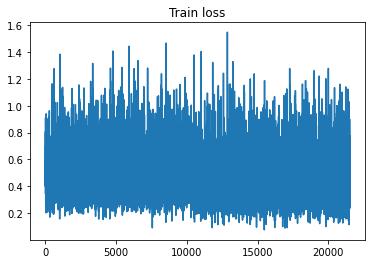

In [ ]:
plt.plot(loss_set)
plt.title('Train loss')
plt.show()

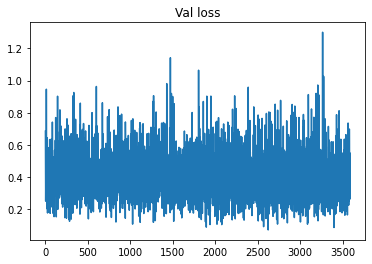

In [ ]:
plt.plot(val_loss_set)
plt.title('Val loss')
plt.show()